In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 100           
    big_blocs = 21           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Combine les deux anciens graphiques :
    - subplot 1 : psychometric curves (x_star search)
    - subplot 2 : slopes = x_star / (var + var1)
    """

    seuil = 0.5
    x_stars = []

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    ax1, ax2 = axes

    # ==========================================
    # ---------- SUBPLOT 1 : courbes ----------
    # ==========================================
    print("=== Points d’intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax1.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax1.scatter([x_cross], [seuil], color=color, zorder=5)
            ax1.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax1.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax1.set_xlabel('Mean S2 value')
    ax1.set_ylabel('Mean decision (P[1])')
    ax1.set_title('Psychometric Functions')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # ==========================================
    # ---------- SUBPLOT 2 : slopes -----------
    # ==========================================

    slopes = slope_x(x_stars, var, var1)
    ax2.plot(range(1, len(slopes)+1), slopes, marker='o')
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Slope (≈ m0 / s0²)")
    ax2.set_title("Slope evolution")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return x_stars, slopes


def reading_csv(file_path):
    df = pd.read_csv(file_path)
    mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path):
    print('test')
    
    data_tuple = reading_csv(file_path)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("Slopes (≈ m0 / s0^2) :", slopes)
    print("x_stars :", x_stars)
    return slopes, x_stars


test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = 0.261


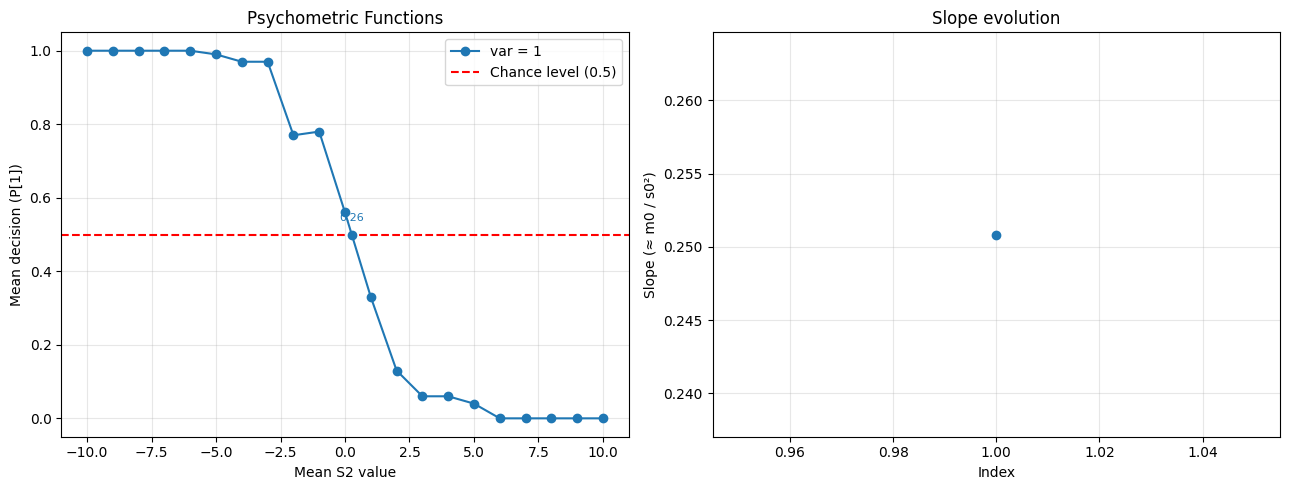

Slopes (≈ m0 / s0^2) : [np.float64(0.250836120401338)]
x_stars : [0.2608695652173915]


In [39]:
file_path = "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal0.csv"
slopes, x_stars = main(file_path=file_path)


Processing file: C:\Users\gabri\Desktop\bayesian\results-mu1_equal-8.csv
test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = -1.704


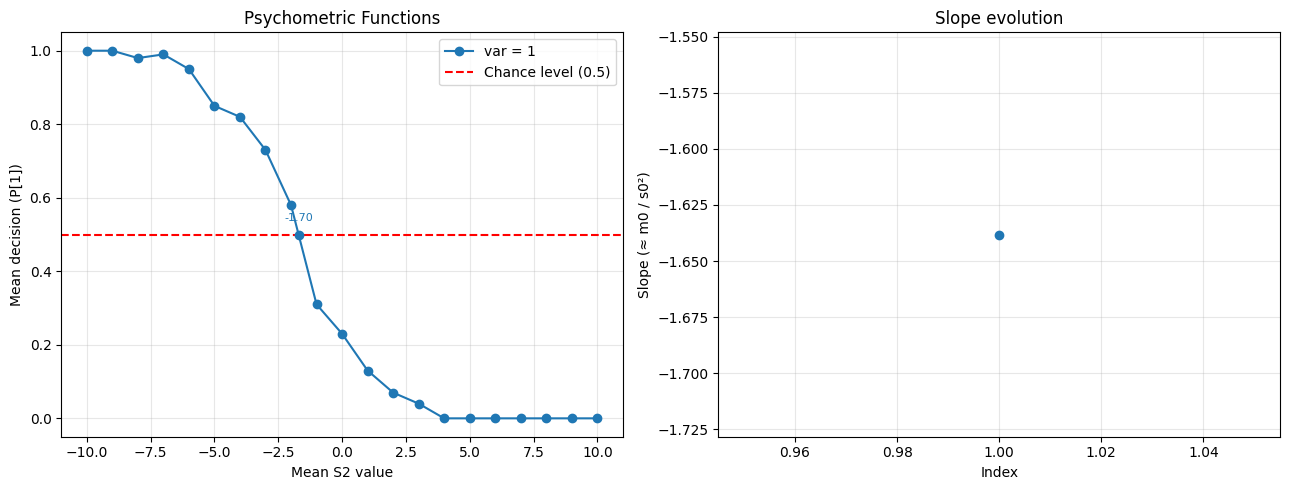

Slopes (≈ m0 / s0^2) : [np.float64(-1.638176638176638)]
x_stars : [-1.7037037037037037]

Processing file: C:\Users\gabri\Desktop\bayesian\results-mu1_equal-2.csv
test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = -1.056


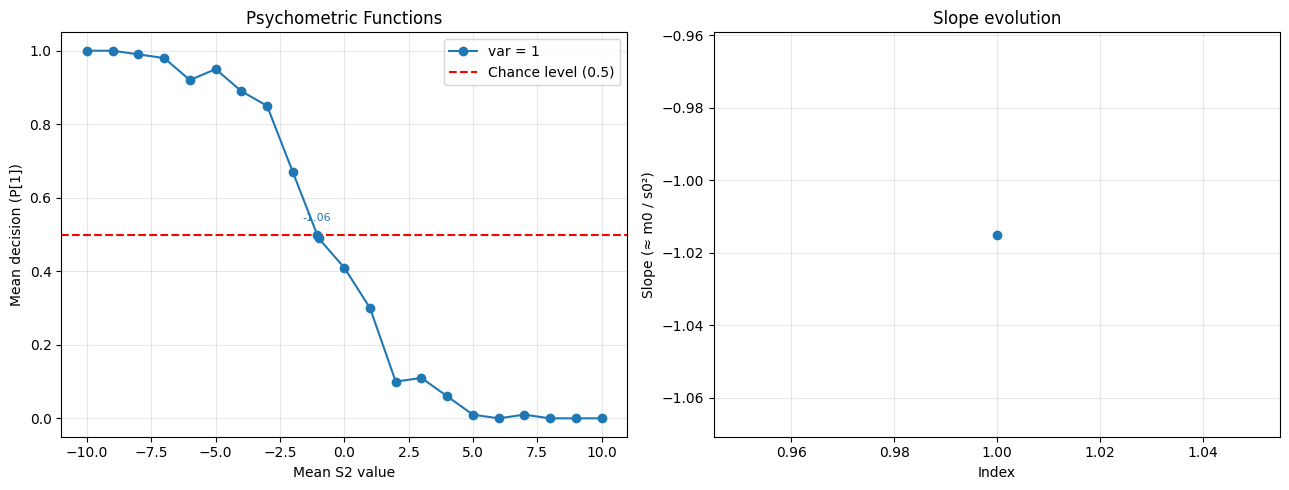

Slopes (≈ m0 / s0^2) : [np.float64(-1.014957264957265)]
x_stars : [-1.0555555555555556]

Processing file: C:\Users\gabri\Desktop\bayesian\results-mu1_equal0.csv
test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = 0.261


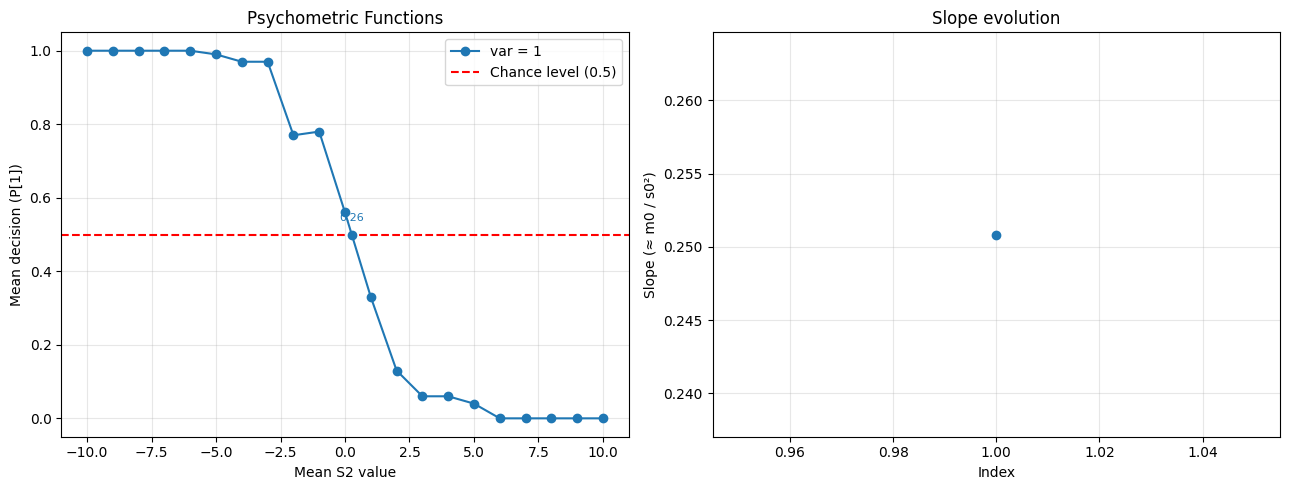

Slopes (≈ m0 / s0^2) : [np.float64(0.250836120401338)]
x_stars : [0.2608695652173915]

Processing file: C:\Users\gabri\Desktop\bayesian\results-mu1_equal2.csv
test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = 0.407


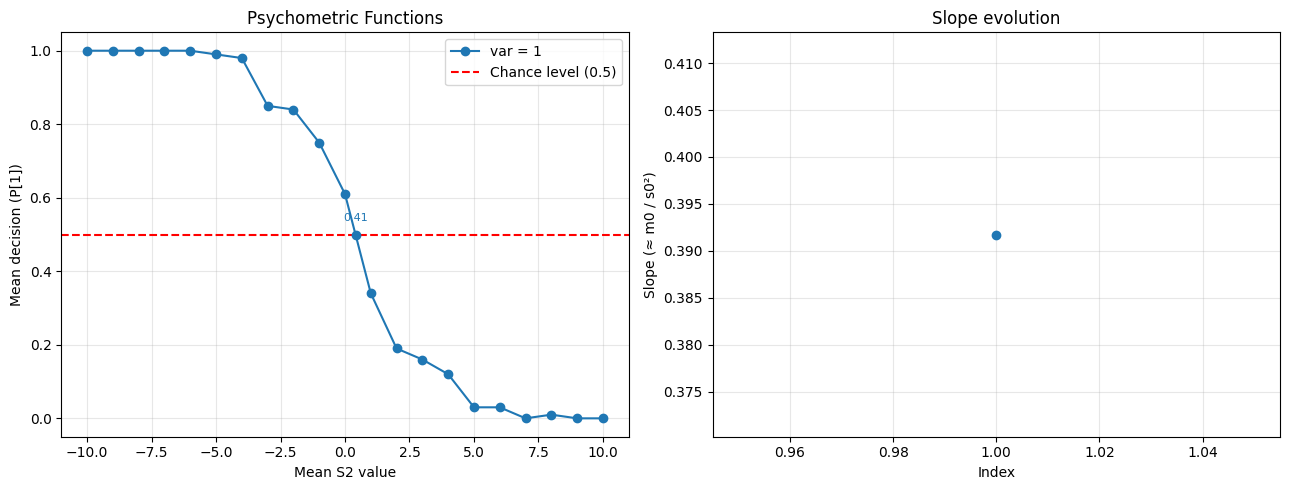

Slopes (≈ m0 / s0^2) : [np.float64(0.39173789173789175)]
x_stars : [0.40740740740740744]

Processing file: C:\Users\gabri\Desktop\bayesian\results-mu1_equal8.csv
test
2100
=== Points d’intersection avec P = 0.5 ===
Bloc 1 : x = -2.091


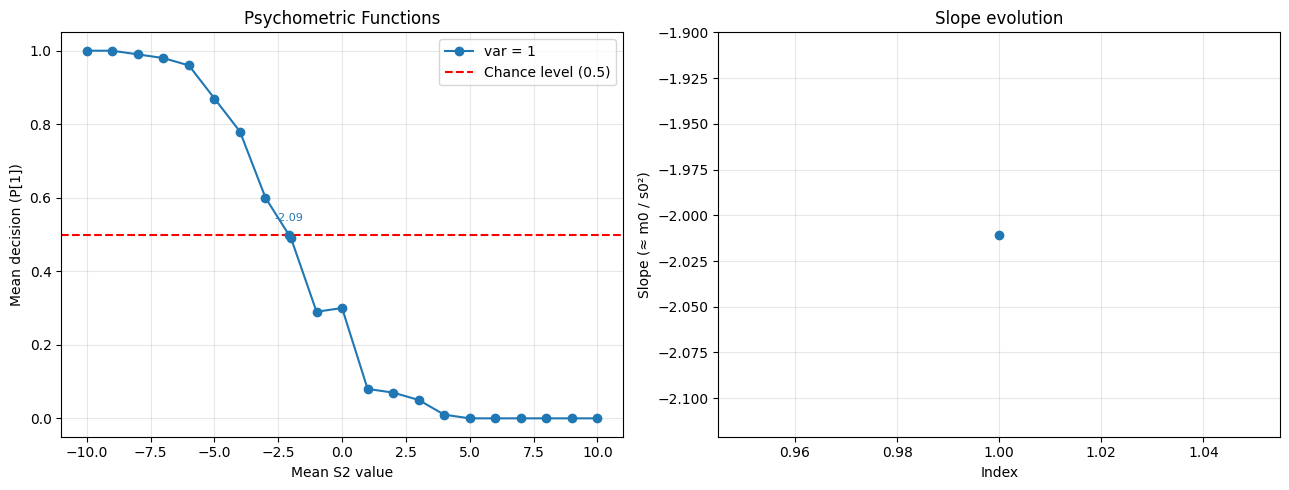

Slopes (≈ m0 / s0^2) : [np.float64(-2.0104895104895104)]
x_stars : [-2.090909090909091]
Values : [-8, -2, 0, 2, 8]
[[-1.7037037037037037], [-1.0555555555555556], [0.2608695652173915], [0.40740740740740744], [-2.090909090909091]]


In [40]:
files = ["C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal-8.csv","C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal-2.csv", "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal0.csv", "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal2.csv", "C:\\Users\\gabri\\Desktop\\bayesian\\results-mu1_equal8.csv"]
x_stars = []
vals = []
for file_path in files:
    print("\nProcessing file:", file_path)
    slope, x_star = main(file_path=file_path)
    x_stars.append(x_star)
    val = file_path.split("equal")[-1].split(".csv")[0]
    vals.append(int(val))
print("Values :", vals)
print(x_stars)
    
    

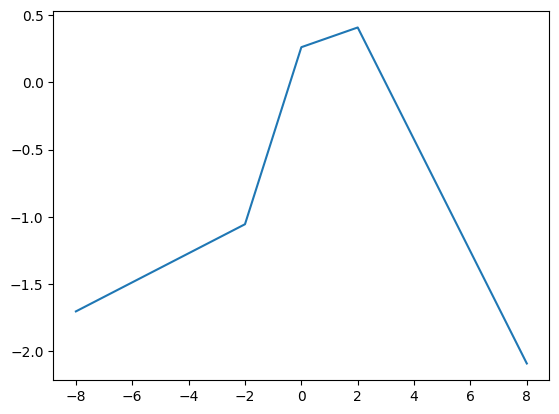

In [41]:
plt.plot(vals,x_stars)

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(vals).reshape(-1, 1)
y = np.array(x_stars)

# regression linéaire
reg = LinearRegression().fit(X, y)

a = reg.coef_[0]   # slope
b = reg.intercept_

print("Slope a =", a)
print("Offset b =", b)


Slope a = [-0.00126263]
Offset b = [-0.83637828]
